 master-thesisInput:
- True Observations
- Number Training Steps

Output:
- New Model Parameter

Parts of Optimization:
- Initialization of Model Parameter
- tbd

# Initialization

## Import Libraries and Mount Drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
from torch import distributions, optim

In [2]:
'''from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')'''

"from google.colab import drive\ndrive.mount('/content/drive')\n\n%cd /content/drive/MyDrive/GitHub/master-thesis\n\nimport sys\nsys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')"

In [3]:
%cd ..

/home/anuar/PycharmProjects/master-thesis


In [4]:
from model.methods import *
from model.modelcore import epid_model
from model.modelhelper import *

## Optimization Settings

In [5]:
start_time='2020-09-15'
end_time='2021-01-15'
observation = 'newly_infected' # or 'hospitalization


dtype = torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #cuda:0

## Initialize Observations

In [6]:
df_obs_initial = pd.read_csv('data/220309_observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])
df_obs, initial_newly_infected = initialize_observations(df_obs_initial, start=start_time, end=end_time)
observed = torch.tensor(df_obs[observation], requires_grad=False, device=device, dtype=dtype)
print(initial_newly_infected)
df_obs.head(3)

[293 367 346 301 296 380]


,Date,number_of_deaths,newly_infected,hospitalization
0,2020-09-15,1,435,14
1,2020-09-16,1,549,21
2,2020-09-17,0,516,13


In [7]:
#for column in df_obs.columns:
#  plt.plot(df_obs['Date'], df_obs[column])
#  plt.title(column)
#  plt.show()

## Initialize Model Parameter

### Initialize helper parameter

In [8]:
cero = torch.tensor(0., requires_grad=False, device=device, dtype=dtype)
num_observations = df_obs.shape[0]
population = torch.tensor(5793636, requires_grad=False, device=device, dtype=dtype)

### Initialize method parameter

In [9]:
method = TwoClusterNN(num_observations, device=device, dtype=dtype)

### Initialize alpha and phi

In [10]:
dict_param = initialize_parameter(['alpha', 'phi'], device, dtype)
dict_param

{'prime_values': {'alpha': tensor(-0.0746, requires_grad=True),
  'phi': tensor(-0., requires_grad=True)},
 'real_values': {'alpha': tensor(0.0100, grad_fn=<AddBackward0>),
  'phi': tensor(25., grad_fn=<AddBackward0>)}}

## Load Method Input Data

In [11]:
def get_input_data(start, end):
  df_cluster = pd.read_csv('data/clustering/220309_percentage_careful.csv' , parse_dates=['date'])
  df_cluster['percentage'] = df_cluster['percentage'].rolling(7).mean()
  time_period = (df_cluster['date'] >= start) & (df_cluster['date'] < end)
  input_data = df_cluster.loc[time_period]['percentage'].copy()
  return input_data.to_numpy()

cluster_percentage = get_input_data(start_time, end_time)

cluster_percentage

array([0.66555097, 0.66388143, 0.66350461, 0.66493214, 0.66387196,
       0.65891288, 0.65861836, 0.65803932, 0.66413519, 0.65547342,
       0.65223196, 0.65413972, 0.65549271, 0.65470901, 0.66099631,
       0.6586284 , 0.66091153, 0.66523724, 0.66309138, 0.65954916,
       0.66057365, 0.65963145, 0.65572727, 0.65880603, 0.64983244,
       0.65289573, 0.64819219, 0.62950871, 0.61840669, 0.60798971,
       0.60094947, 0.60486398, 0.60557296, 0.610484  , 0.62250706,
       0.62875304, 0.63901692, 0.6442434 , 0.64518044, 0.65172101,
       0.66558701, 0.67136547, 0.67777097, 0.68446907, 0.68730556,
       0.69224672, 0.69056838, 0.6955367 , 0.70023374, 0.70556218,
       0.6955118 , 0.70177327, 0.70544134, 0.70705458, 0.69404733,
       0.69471345, 0.68134168, 0.69107779, 0.67831415, 0.67331415,
       0.67331259, 0.67596991, 0.67272556, 0.6810257 , 0.68160139,
       0.68298375, 0.68223144, 0.68190414, 0.68350407, 0.68105158,
       0.67274916, 0.67805659, 0.68554624, 0.68280647, 0.68587

# Optimization

## Training

Step: 0, Time: 0.11121582984924316, Loss: 2776551.5, Mean Expected Daily Hospit: 22.265024185180664


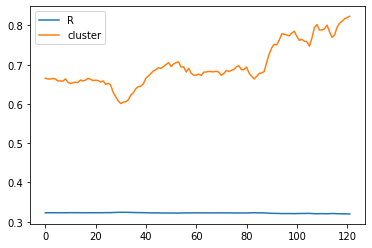

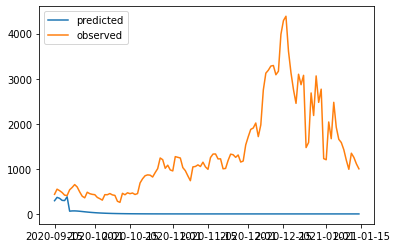

Step: 50, Time: 0.1143796443939209, Loss: 2756365.0, Mean Expected Daily Hospit: 40.40365219116211


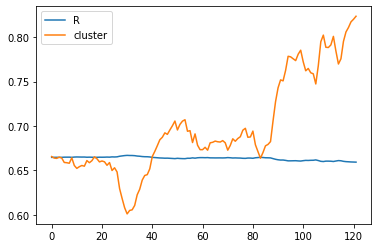

Step: 100, Time: 0.05164647102355957, Loss: 667228.625, Mean Expected Daily Hospit: 1159.7999267578125


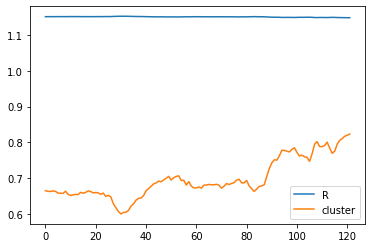

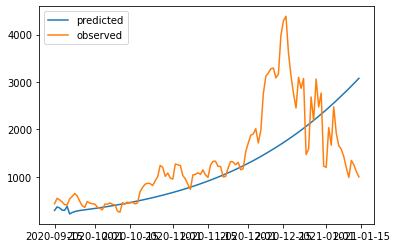

Step: 150, Time: 0.046295166015625, Loss: 663554.9375, Mean Expected Daily Hospit: 1130.249755859375


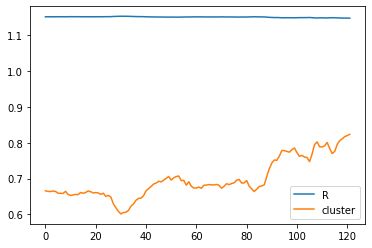

Step: 200, Time: 0.05063438415527344, Loss: 661461.5, Mean Expected Daily Hospit: 1131.3387451171875


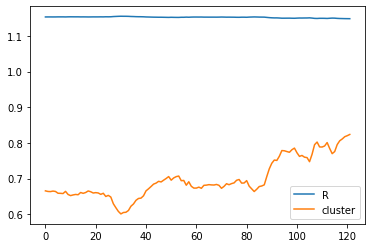

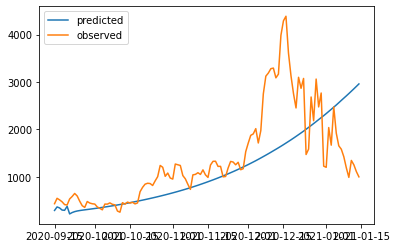

Step: 250, Time: 0.0471799373626709, Loss: 659022.4375, Mean Expected Daily Hospit: 1133.3507080078125


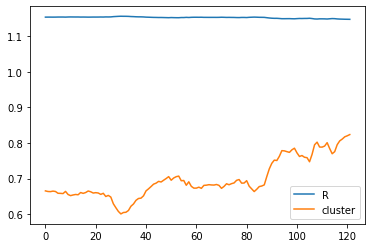

Step: 300, Time: 0.06184506416320801, Loss: 656243.0625, Mean Expected Daily Hospit: 1134.88037109375


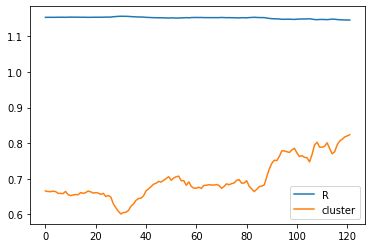

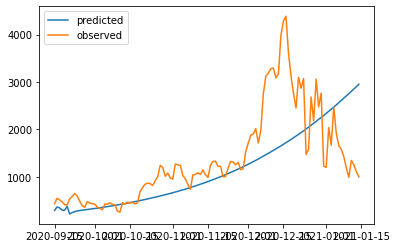

Step: 350, Time: 0.049926042556762695, Loss: 653112.75, Mean Expected Daily Hospit: 1136.60595703125


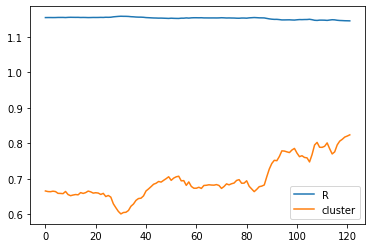

Step: 400, Time: 0.045374155044555664, Loss: 649610.1875, Mean Expected Daily Hospit: 1138.5396728515625


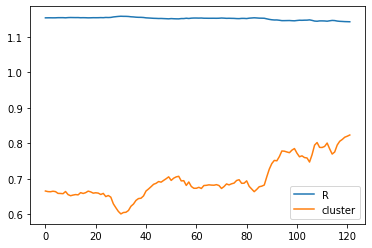

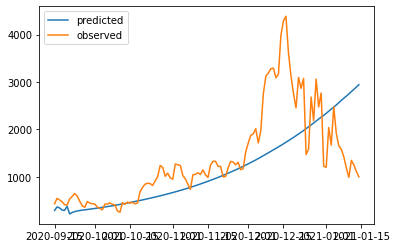

Step: 450, Time: 0.05542707443237305, Loss: 645703.375, Mean Expected Daily Hospit: 1140.7008056640625


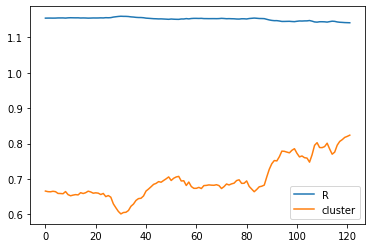

Step: 500, Time: 0.050573110580444336, Loss: 641346.6875, Mean Expected Daily Hospit: 1143.1126708984375


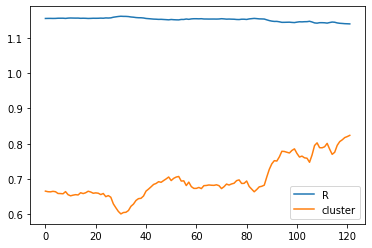

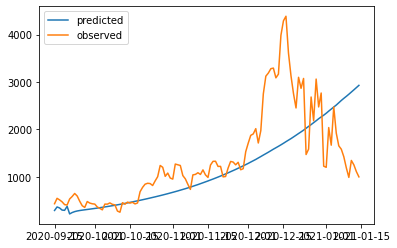

Step: 550, Time: 0.05004239082336426, Loss: 636480.1875, Mean Expected Daily Hospit: 1145.80517578125


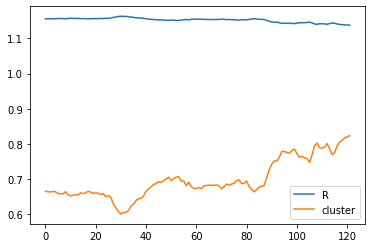

Step: 600, Time: 0.0883779525756836, Loss: 631025.8125, Mean Expected Daily Hospit: 1148.82568359375


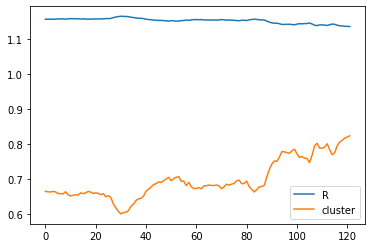

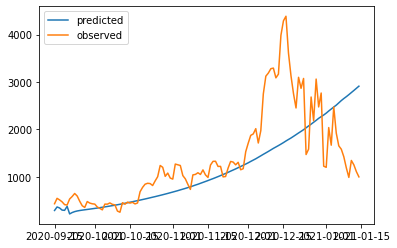

Step: 650, Time: 0.11210799217224121, Loss: 624883.1875, Mean Expected Daily Hospit: 1152.2310791015625


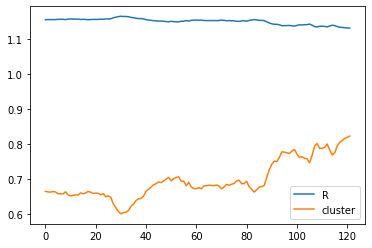

Step: 700, Time: 0.10201025009155273, Loss: 617924.75, Mean Expected Daily Hospit: 1156.0926513671875


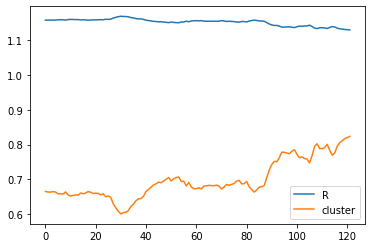

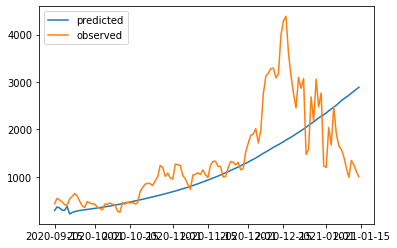

Step: 750, Time: 0.10287094116210938, Loss: 609987.0625, Mean Expected Daily Hospit: 1160.505615234375


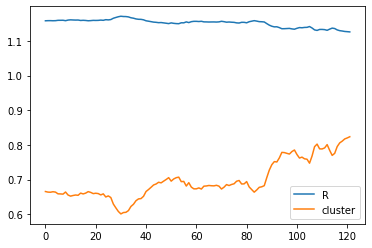

Step: 800, Time: 0.09002089500427246, Loss: 600862.6875, Mean Expected Daily Hospit: 1165.58837890625


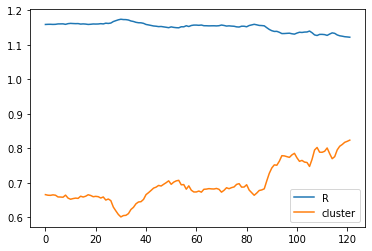

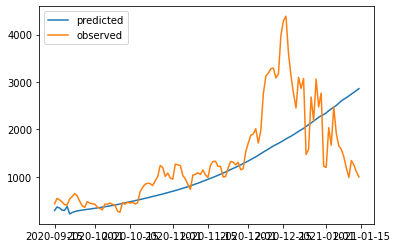

Step: 850, Time: 0.10324978828430176, Loss: 590286.6875, Mean Expected Daily Hospit: 1171.4967041015625


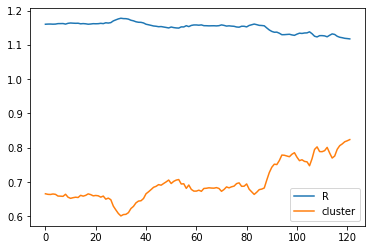

Step: 900, Time: 0.09415173530578613, Loss: 577923.1875, Mean Expected Daily Hospit: 1178.429443359375


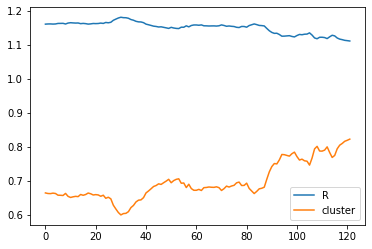

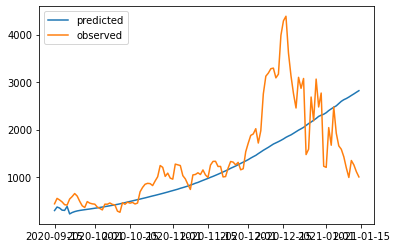

Step: 950, Time: 0.09865760803222656, Loss: 563347.75, Mean Expected Daily Hospit: 1186.6458740234375


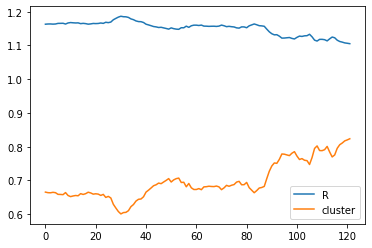

Step: 1000, Time: 0.0947422981262207, Loss: 546033.0625, Mean Expected Daily Hospit: 1196.472900390625


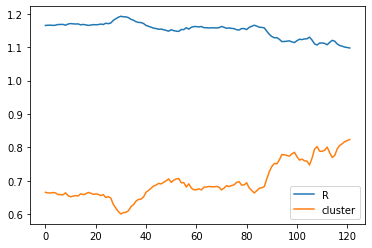

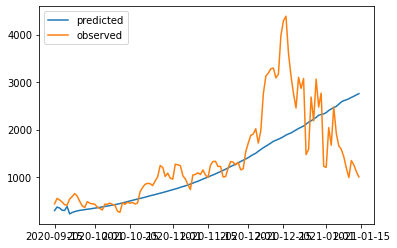

Step: 1050, Time: 0.09351253509521484, Loss: 525345.625, Mean Expected Daily Hospit: 1208.33251953125


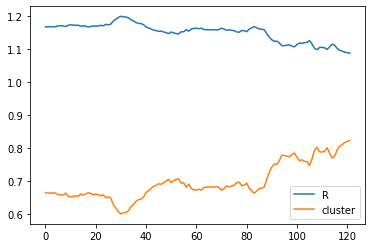

Step: 1100, Time: 0.09223103523254395, Loss: 500580.25, Mean Expected Daily Hospit: 1222.683349609375


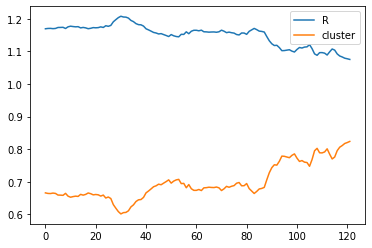

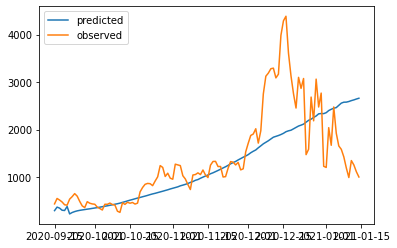

Step: 1150, Time: 0.09752321243286133, Loss: 471051.09375, Mean Expected Daily Hospit: 1240.2037353515625


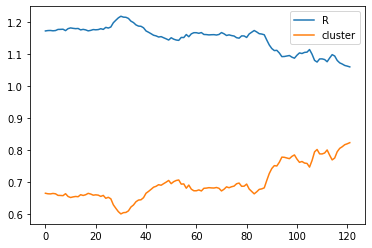

Step: 1200, Time: 0.08600258827209473, Loss: 438381.625, Mean Expected Daily Hospit: 1260.9788818359375


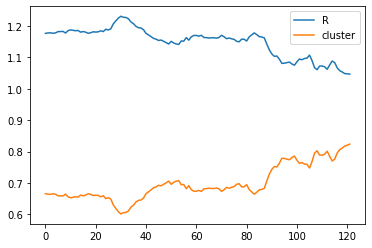

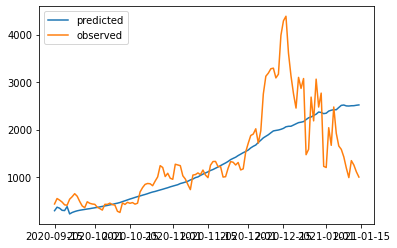

Step: 1250, Time: 0.09333539009094238, Loss: 402484.65625, Mean Expected Daily Hospit: 1283.1429443359375


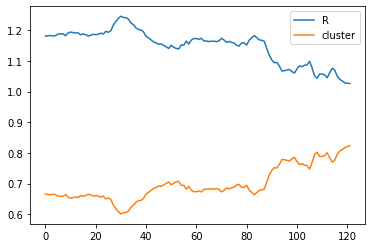

Step: 1300, Time: 0.05650639533996582, Loss: 363673.34375, Mean Expected Daily Hospit: 1309.0965576171875


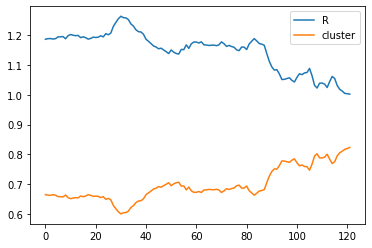

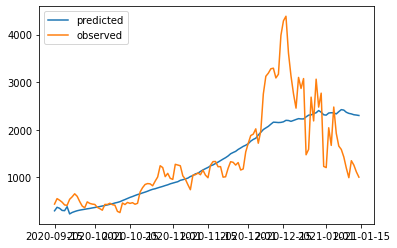

Step: 1350, Time: 0.047303199768066406, Loss: 325015.3125, Mean Expected Daily Hospit: 1336.6326904296875


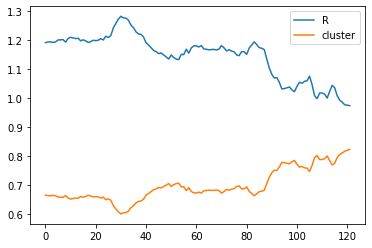

Step: 1400, Time: 0.04510688781738281, Loss: 273735.625, Mean Expected Daily Hospit: 1376.90966796875


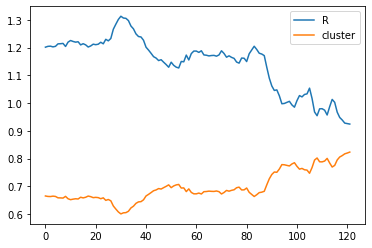

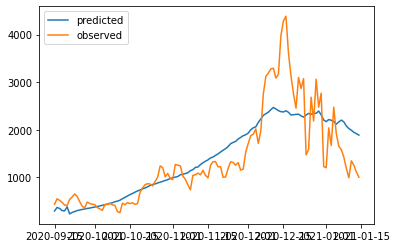

Step: 1450, Time: 0.04495120048522949, Loss: 239058.5625, Mean Expected Daily Hospit: 1409.5584716796875


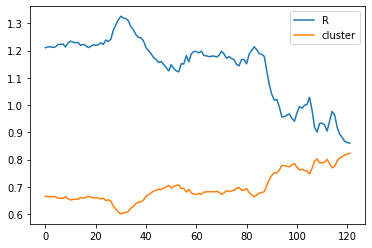

Step: 1500, Time: 0.04664778709411621, Loss: 231501.046875, Mean Expected Daily Hospit: 1419.21240234375


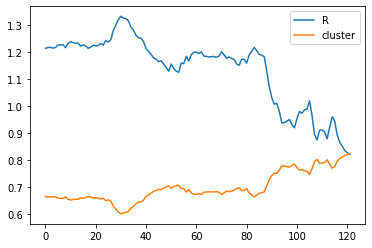

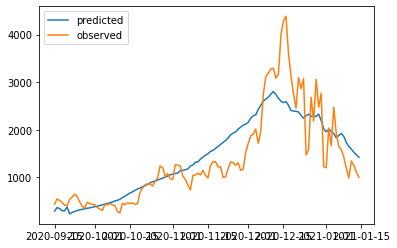

Step: 1550, Time: 0.049048662185668945, Loss: 228972.625, Mean Expected Daily Hospit: 1418.3167724609375


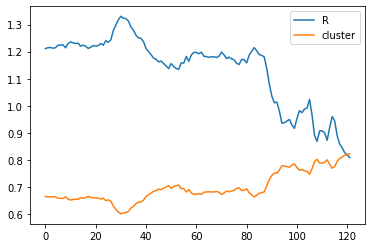

Step: 1600, Time: 0.04197263717651367, Loss: 226318.078125, Mean Expected Daily Hospit: 1418.6749267578125


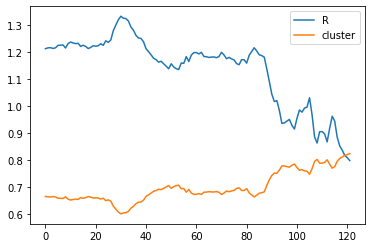

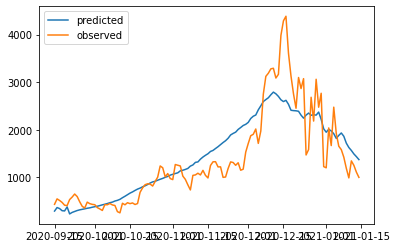

Step: 1650, Time: 0.050872087478637695, Loss: 223635.390625, Mean Expected Daily Hospit: 1419.8426513671875


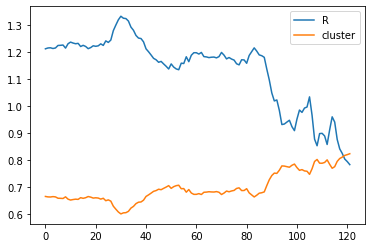

Step: 1700, Time: 0.05124306678771973, Loss: 221308.671875, Mean Expected Daily Hospit: 1419.8441162109375


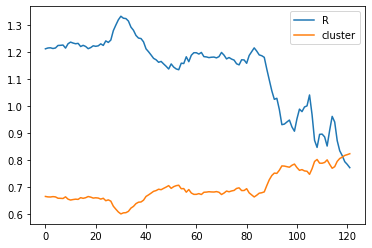

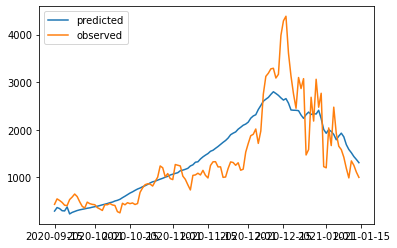

Step: 1750, Time: 0.06042051315307617, Loss: 218766.25, Mean Expected Daily Hospit: 1420.694580078125


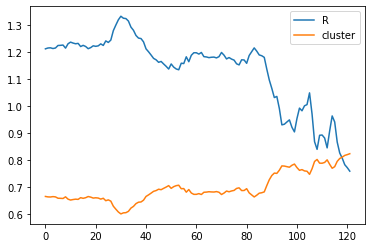

Step: 1800, Time: 0.04577779769897461, Loss: 216641.625, Mean Expected Daily Hospit: 1429.3582763671875


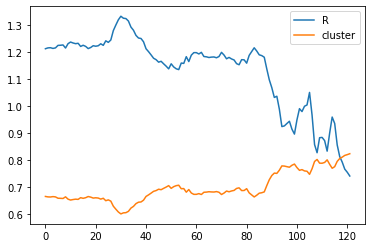

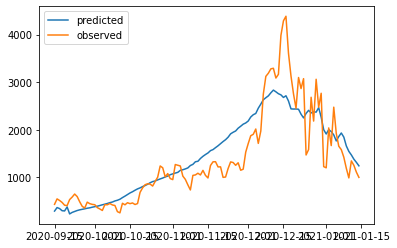

Step: 1850, Time: 0.1652233600616455, Loss: 214743.46875, Mean Expected Daily Hospit: 1420.255615234375


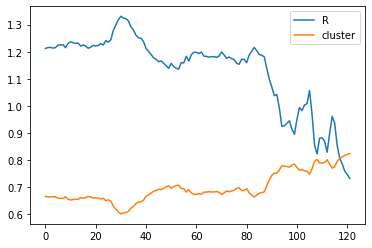

Step: 1900, Time: 0.10271787643432617, Loss: 212933.359375, Mean Expected Daily Hospit: 1420.0986328125


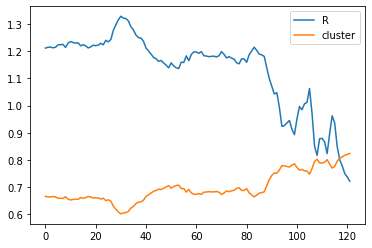

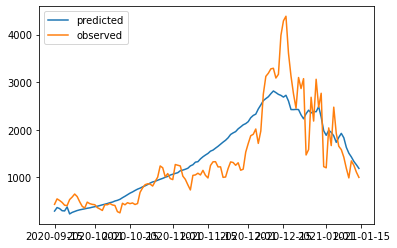

Step: 1950, Time: 0.0945441722869873, Loss: 210961.9375, Mean Expected Daily Hospit: 1419.60888671875


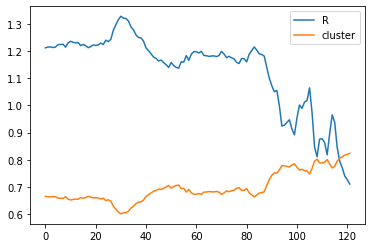

Step: 2000, Time: 0.1091165542602539, Loss: 209071.328125, Mean Expected Daily Hospit: 1420.0040283203125


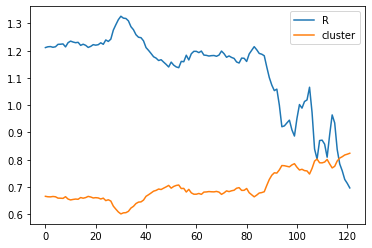

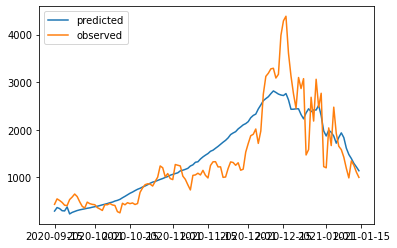

Step: 2050, Time: 0.09145855903625488, Loss: 207540.53125, Mean Expected Daily Hospit: 1425.6181640625


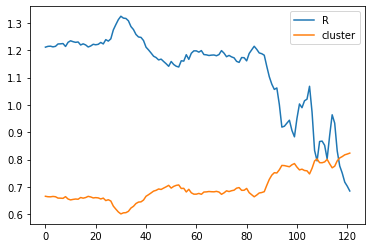

Step: 2100, Time: 0.09523153305053711, Loss: 206099.046875, Mean Expected Daily Hospit: 1409.9742431640625


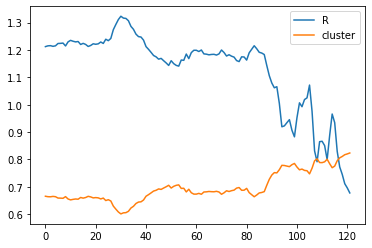

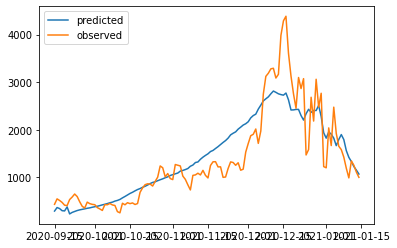

Step: 2150, Time: 0.08293747901916504, Loss: 204492.953125, Mean Expected Daily Hospit: 1413.5791015625


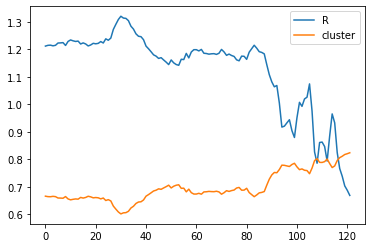

Step: 2200, Time: 0.08752918243408203, Loss: 203043.90625, Mean Expected Daily Hospit: 1416.7581787109375


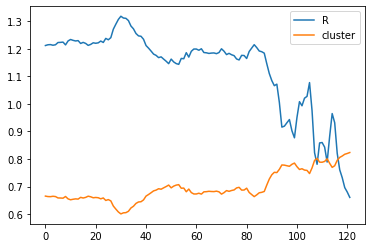

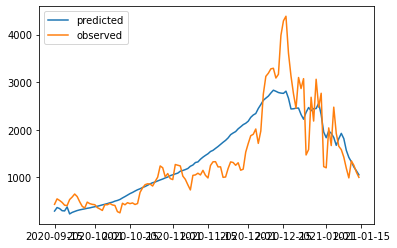

Step: 2250, Time: 0.09574723243713379, Loss: 201657.875, Mean Expected Daily Hospit: 1415.6868896484375


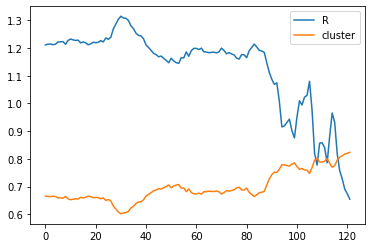

Step: 2300, Time: 0.0913848876953125, Loss: 200309.34375, Mean Expected Daily Hospit: 1414.801025390625


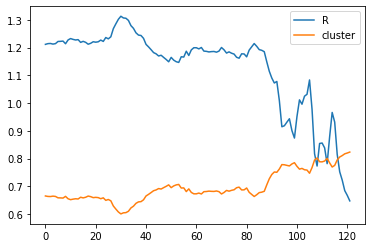

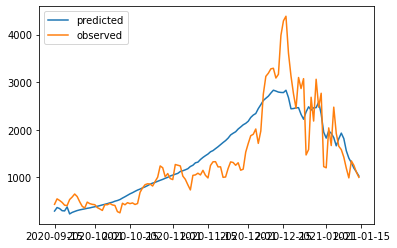

Step: 2350, Time: 0.10097479820251465, Loss: 198998.484375, Mean Expected Daily Hospit: 1413.89013671875


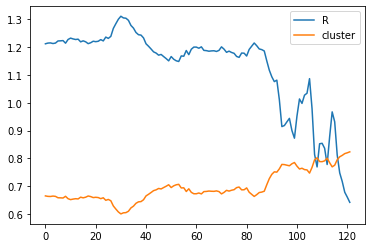

Step: 2400, Time: 0.1016085147857666, Loss: 197724.34375, Mean Expected Daily Hospit: 1412.94580078125


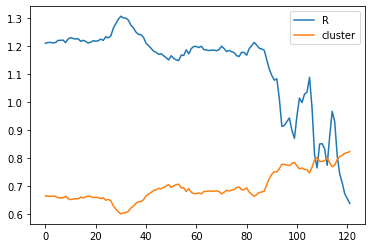

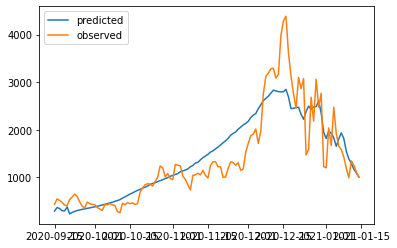

Step: 2450, Time: 0.10111117362976074, Loss: 196443.65625, Mean Expected Daily Hospit: 1412.0802001953125


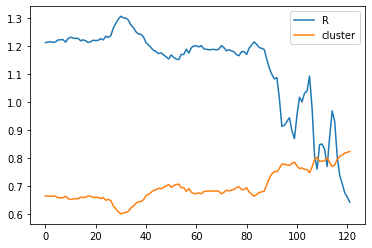

Step: 2500, Time: 0.08429551124572754, Loss: 197005.28125, Mean Expected Daily Hospit: 1382.4468994140625


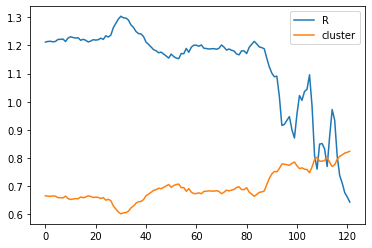

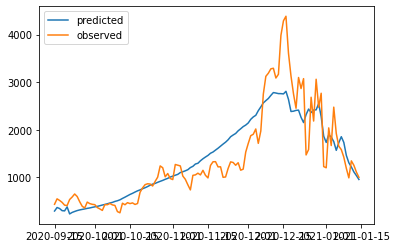

Step: 2550, Time: 0.04540443420410156, Loss: 194176.65625, Mean Expected Daily Hospit: 1411.7987060546875


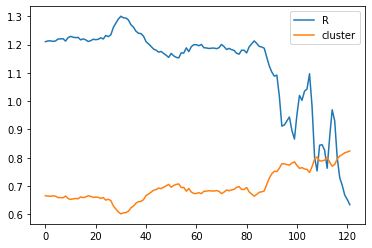

Step: 2600, Time: 0.05970621109008789, Loss: 193135.109375, Mean Expected Daily Hospit: 1410.267333984375


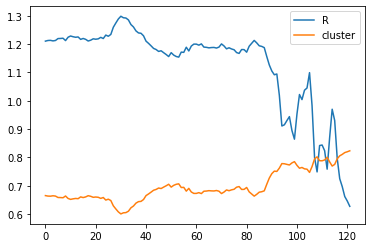

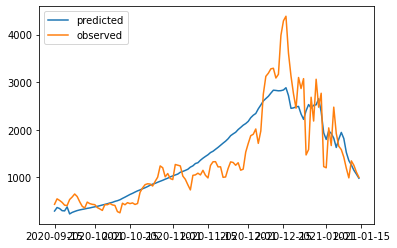

Step: 2650, Time: 0.05881857872009277, Loss: 192126.21875, Mean Expected Daily Hospit: 1409.268310546875


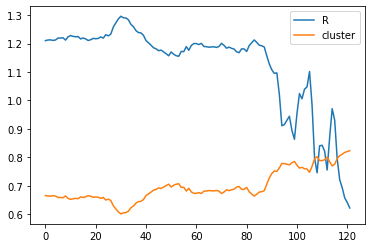

Step: 2700, Time: 0.049271345138549805, Loss: 191308.359375, Mean Expected Daily Hospit: 1402.295166015625


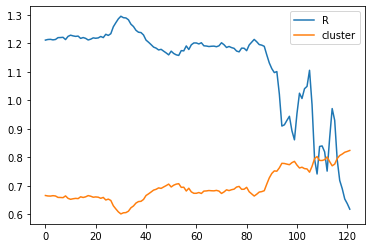

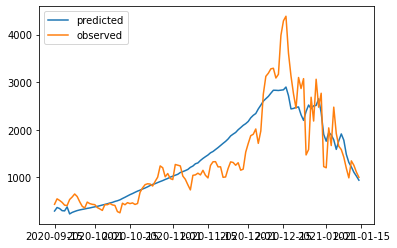

Step: 2750, Time: 0.04859352111816406, Loss: 190368.90625, Mean Expected Daily Hospit: 1398.35986328125


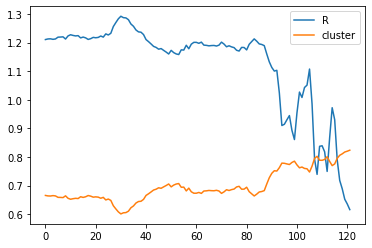

Step: 2800, Time: 0.06191229820251465, Loss: 189461.25, Mean Expected Daily Hospit: 1415.0860595703125


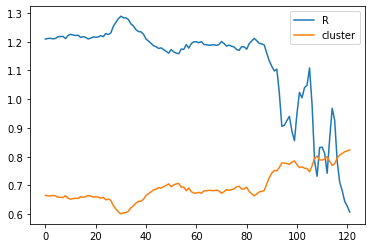

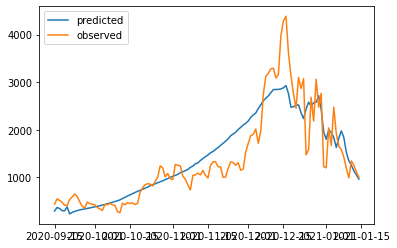

Step: 2850, Time: 0.0641324520111084, Loss: 188894.78125, Mean Expected Daily Hospit: 1389.90625


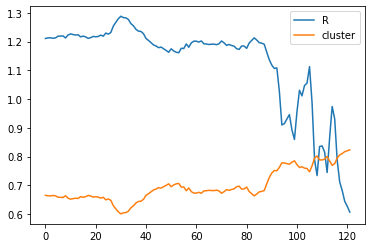

Step: 2900, Time: 0.05469965934753418, Loss: 187741.84375, Mean Expected Daily Hospit: 1415.09423828125


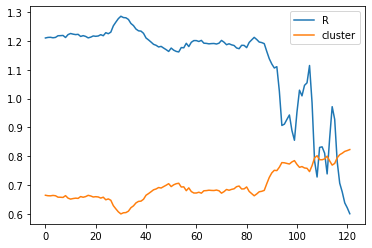

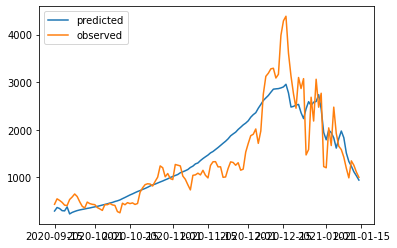

Step: 2950, Time: 0.0787353515625, Loss: 186738.78125, Mean Expected Daily Hospit: 1403.3348388671875


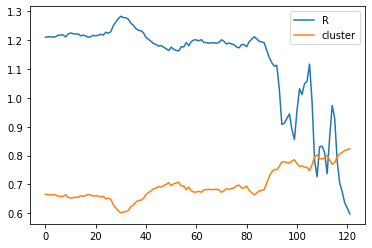

Step: 3000, Time: 0.09785294532775879, Loss: 185946.375, Mean Expected Daily Hospit: 1404.8245849609375


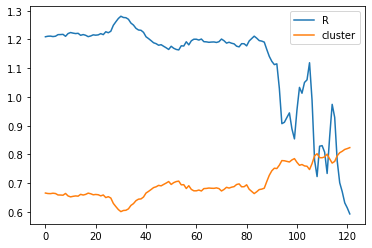

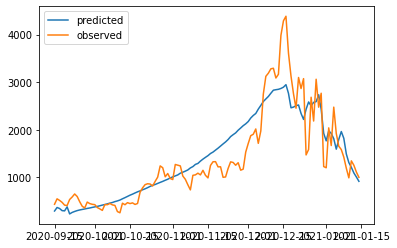

Step: 3050, Time: 0.1044771671295166, Loss: 185173.25, Mean Expected Daily Hospit: 1402.3221435546875


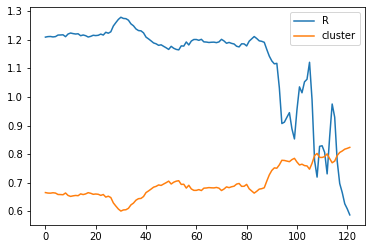

Step: 3100, Time: 0.1128697395324707, Loss: 184638.890625, Mean Expected Daily Hospit: 1393.1268310546875


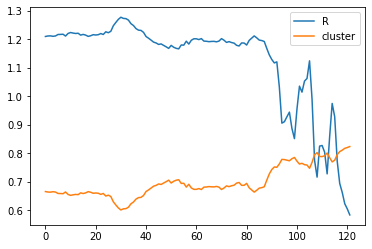

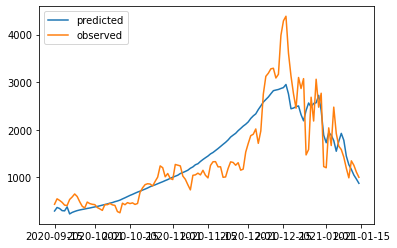

KeyboardInterrupt: 

In [12]:
epochs = 10000
model_parameter = [dict_param['prime_values']['alpha'], dict_param['prime_values']['phi']]

params_to_be_optimized = method.get_parameters()# + model_parameter

#optimizer = optim.Adam(params_to_be_optimized, lr=0.01)
optimizer = optim.Adam(params_to_be_optimized, lr=0.001)

for i in range(epochs):
  start_time = time.time()
  optimizer.zero_grad()

  # transform alphi, phi
  transform_prime_variables(dict_param)

  # forward pass
  expected = epid_model(population, R=method.calculate_R(cluster_percentage), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
  # calc loss
  comparison_loss =  calc_mse(expected, observed)#dict_param['real_values']['phi'] *
  method_loss = method.calculate_loss()
  loss = comparison_loss #+ method_loss

  # backward pass
  loss.backward()
  optimizer.step()

  if i % 50==0:
      print(f'Step: {i}, Time: {time.time() - start_time}, Loss: {loss}, Mean Expected Daily Hospit: {expected.cpu().detach().numpy().mean()}')
      plt.plot(method.calculate_R(cluster_percentage).cpu().detach().numpy(), label='R')
      plt.plot(cluster_percentage, label='cluster')
      plt.legend()
      plt.show()
  if i % 100==0:
    #print(method.calculate_R(cluster_percentage))
    plt.plot(df_obs['Date'], expected.cpu().detach().numpy(), label='predicted')
    plt.plot(df_obs['Date'], observed.cpu().detach().numpy(), label='observed')
    plt.legend()
    plt.show()


# Evaluation

In [16]:
expected_normal = epid_model(population, R=method.calculate_R(cluster_percentage), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]



expected_careful= epid_model(population, R=method.calculate_R(np.ones(cluster_percentage.size)*0.8), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]

expected_crazy = epid_model(population, R=method.calculate_R(np.ones(cluster_percentage.size)*0.2), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]

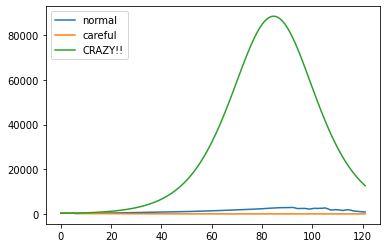

In [19]:
plt.plot(expected_normal.cpu().detach().numpy(),label='normal')
plt.plot(expected_careful.cpu().detach().numpy(),label='careful')
plt.plot(expected_crazy.cpu().detach().numpy(),label='CRAZY!!')
plt.legend()
plt.show()